# Homework 3
### Intro to Optimization

##### 9/20/2018 

#### Cade Parkison
##### U0939163

---



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import hilbert
from opt_algs import *

## Problem 2

---

**Beck Exercise 3.2.**

Generate thirty points $(x_i
, y_i), i = 1, 2, . . . , 30,$  by the MATLAB code

```matlab
randn(’seed’,314);
x = linspace(0,1,30)’;
y = 2∗x.ˆ 2 − 3∗x + 1 + 0.05∗randn(size(x));

```

Find the quadratic function $y = ax^2 +bx+c$ that best fits the points in the least squares sense.
Indicate what are the parameters $a, b, c$ found by the least squares solution and plot the points
along with the derived quadratic function. The resulting plot should look like the one in Figure
3.5.

In [2]:
np.random.seed(314)
x = np.linspace(0,1,30).T
y = 2*x**2 - 3*x + 1 + 0.05*np.random.randn(np.size(x))

In [3]:
A = np.stack((np.ones(x.shape), x, x**2),axis=-1)

In [4]:
X = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, y))
X

array([ 0.99807441, -2.94502388,  1.95315053])

**Generate Plot:**

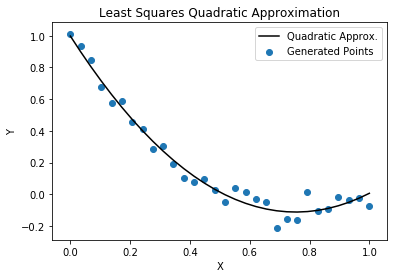

In [5]:
plt.scatter(x,y, label='Generated Points')
plt.plot(x,X[0]+X[1]*x+ X[2]*x**2,c='k', label='Quadratic Approx.')
plt.title('Least Squares Quadratic Approximation')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()
plt.savefig('Problem2.pdf')
plt.show()

## Problem 3

---
 Write a MATLAB function circle_fit whose input is an $n × m$ matrix $A$,
the columns of A are the m vectors in $R^n$
to which a circle should be fitted. The call to the
function will be of the form:

```matlab
[x, r] = circlefit(A)
```

In [6]:
# test data
a1 = np.array([0, 0])
a2 = np.array([0.5, 0])
a3 = np.array([1, 0])
a4 = np.array([1, 1])
a5 = np.array([0, 1])

A = np.stack((a1,a2,a3,a4,a5), axis=-1)

n,m = np.shape(A)
n,m = int(n), int(m)

a = np.column_stack((2*A.T, -1*np.ones(m)[:, np.newaxis] ))

b = np.linalg.norm(A.T, axis=-1)**2

X = np.dot(np.dot(np.linalg.inv(np.dot(a.T, a)), a.T), b)

r = np.sqrt(X[0]**2 + X[1]**2 - X[2])

**Generate Plot:**

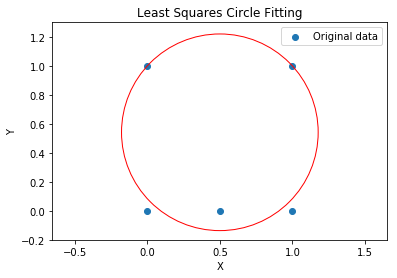

In [7]:
ax = plt.gca()
plt.axis('equal')

ax.scatter(A[:1], A[1:], label='Original data')
#ax.scatter(X[0], X[1], c='r')

circle = plt.Circle((X[0], X[1]), radius=r, fill=False, color='r', label='Fitted Circle')
ax.add_artist(circle)

plt.title('Least Squares Circle Fitting')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()
plt.axis('equal')
plt.ylim(-.2, 1.3)

plt.savefig('CircleFit.pdf')
plt.show()

## Problem 4
---

In [8]:
# Hilbert Matrix
A = hilbert(5)
b = np.zeros(5)

# Quadratic Function
f = lambda x: x@A@x
g = lambda x: 2*A@x

# Initial vector X0
x0 = np.array([1,2,3,4,5])
xs = x0

# convergence tolerance 
epsilon = 1e-4

---
 gradient method with backtracking stepsize rule and parameters α = 0.5, β = 0.5, s = 1;

In [35]:
s = 1
alpha = 0.5
beta = 0.5

In [23]:
x, fun_val = gradient_method_backtracking(f, g, x0, s, alpha, beta, epsilon)

In [24]:
iters=3301

--- 
gradient method with backtracking stepsize rule and parameters α = 0.1, β = 0.5, s = 1;


In [25]:
alpha = 0.1
beta = 0.5
s = 1

In [26]:
x, fun_val = gradient_method_backtracking(f, g, x0, s, alpha, beta, epsilon)

In [27]:
iters=3732

---
gradient method with exact line search;

In [28]:
x, fun_val = gradient_method_quadratic(A, b, x0, epsilon)

In [29]:
iters = 1271

---
diagonally scaled gradient method with diagonal elements Dii =
1
Aii
, i = 1, 2, 3, 4, 5 and
exact line search;

In [30]:
# Hilbert Matrix
A = hilbert(5)
b = np.zeros(5)

# Quadratic Function
f = lambda x: x@A@x

# Initial vector X0
x0 = np.array([1,2,3,4,5])
xs = x0

# convergence tolerance 
epsilon = 1e-4

d = np.array([])
for i in range(5):
    d = np.append(d, 1/A[i,i])
    
D = np.diag(d)

x,fun_val = gradient_scaled_quadratic(A,b,D,x0, epsilon)

In [31]:
iters=235

---
Diagonally scaled gradient method with diagonal elements 

and
backtracking line search with parameters α = 0.1, β = 0.5, s = 1;

In [32]:
h = lambda x: 2*A

alpha = 0.5
beta = 0.5
s = 1

In [33]:
x,fun_val = newton_backtracking(f,g,h, x0, alpha, beta, epsilon)

In [34]:
iters=15